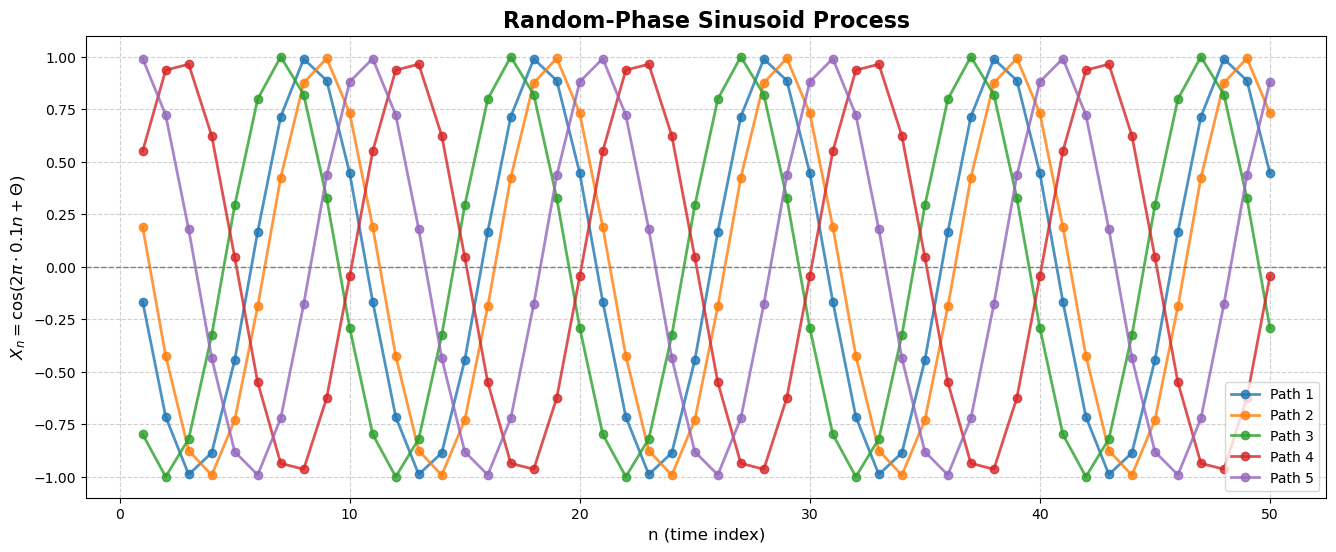

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = np.arange(1, 51)        # n = 1,2,...,50
num_paths = 5                # number of sample paths
freq = 0.1                   # frequency

# Generate sample paths
plt.figure(figsize=(16, 6))
for i in range(num_paths):
    theta = np.random.uniform(0, 2*np.pi)  # random phase
    Xn = np.cos(2 * np.pi * freq * n + theta)
    plt.plot(n, Xn, marker='o', linewidth=2, alpha=0.8, label=f'Path {i+1}')

# Formatting the plot
plt.title("Random-Phase Sinusoid Process", fontsize=16, weight='bold')
plt.xlabel("n (time index)", fontsize=12)
plt.ylabel(r"$X_n = \cos(2\pi \cdot 0.1 n + \Theta)$", fontsize=12)
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


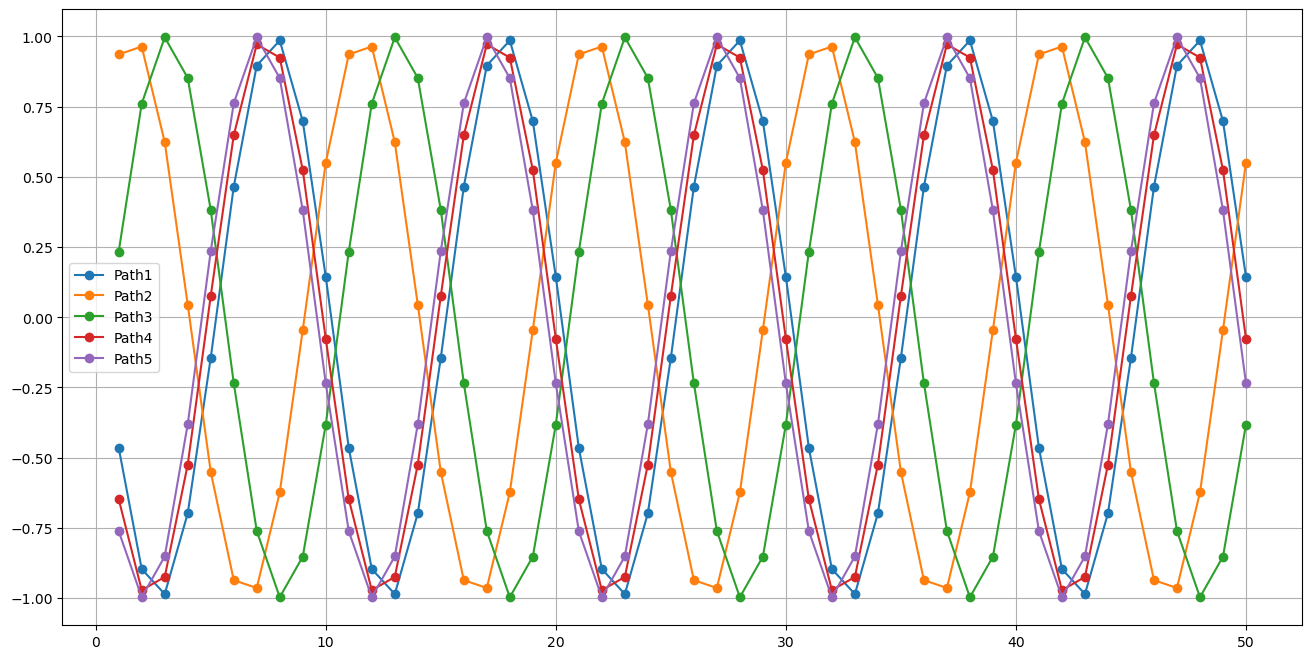

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

inp = np.arange(1,51)
numPaths = 5
frequency =0.1


plt.figure(figsize = (16,8))
for i in range(numPaths):
    theta = np.random.uniform(0,2*np.pi)
    Xn = np.cos(2*np.pi*frequency*inp + theta)
    plt.plot(inp ,Xn, marker = 'o', label = f'Path{i+1}')
plt.grid(True)
plt.legend()

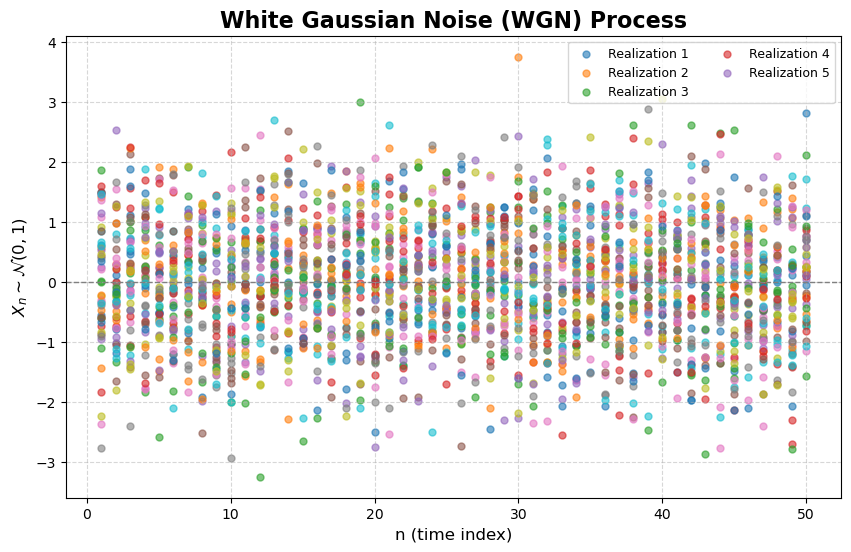

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = np.arange(1, 51)     # n = 1,...,50
num_realizations = 50    # number of realizations
variance = 1             # sigma^2 = 1
mean = 0

# Generate WGN realizations
plt.figure(figsize=(10, 6))
for i in range(num_realizations):
    Xn = np.random.normal(mean, np.sqrt(variance), size=len(n))
    plt.scatter(n, Xn, alpha=0.6, s=25, label=f'Realization {i+1}' if i < 5 else "")

# Formatting
plt.title("White Gaussian Noise (WGN) Process", fontsize=16, weight='bold')
plt.xlabel("n (time index)", fontsize=12)
plt.ylabel(r"$X_n \sim \mathcal{N}(0,1)$", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, linestyle="--", alpha=0.5)

# Only show legend for first few paths to avoid clutter
plt.legend(loc="upper right", fontsize=9, frameon=True, ncol=2)
plt.show()


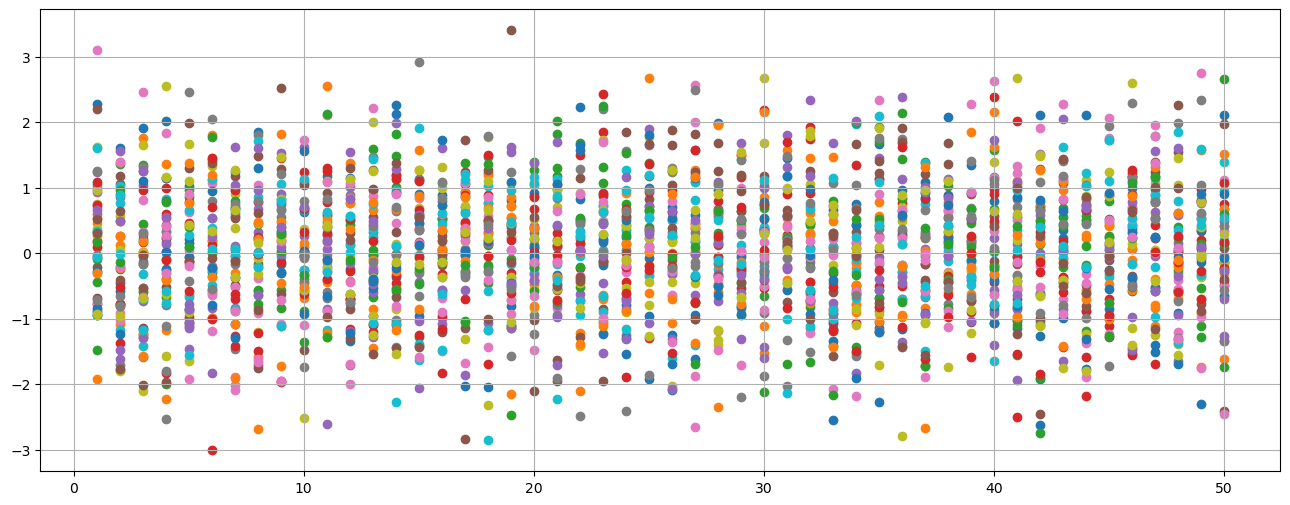

In [10]:
inp = np.arange(1,51)
numPaths = 50
plt.figure(figsize=(16,6))
for i in range(numPaths):
    Xn = np.random.normal(0,1,size = len(inp))
    plt.scatter(inp , Xn)

plt.grid(True)



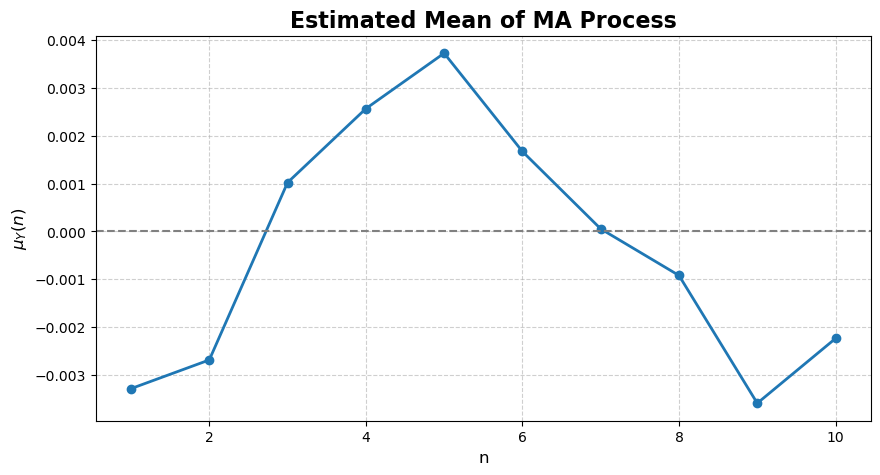

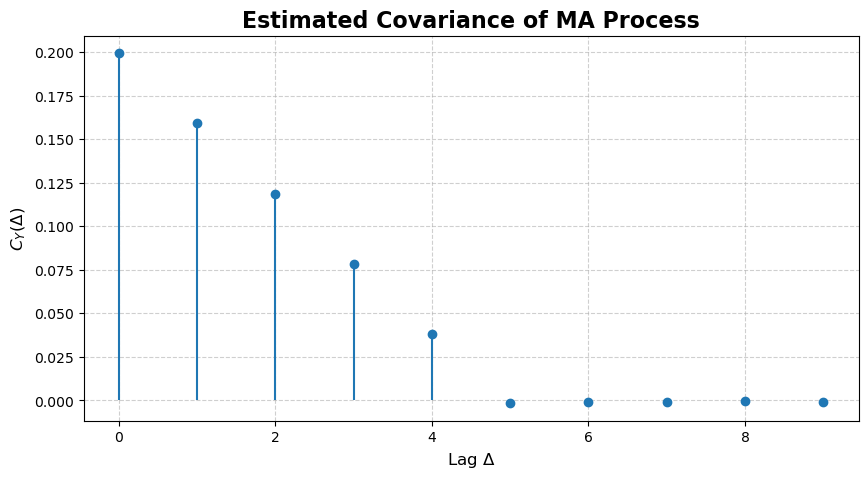

Mean values: [-0.003 -0.003  0.001  0.003  0.004  0.002  0.    -0.001 -0.004 -0.002]
Covariance estimates: [ 0.199  0.159  0.119  0.078  0.038 -0.002 -0.001 -0.001 -0.    -0.001]

Observation:
If mean ≈ constant (≈0) and covariance depends only on Δ (not n),
then {Y_n} can be considered Wide-Sense Stationary (WSS).


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 5                     # window size for MA
n_max = 10                 # n = 1,...,10
M = 10_000                 # number of realizations
var = 1                    # variance of WGN

# Generate M realizations of WGN
X = np.random.normal(0, np.sqrt(var), size=(M, n_max + N))  

# Compute MA process
Y = np.zeros((M, n_max))
for n in range(1, n_max+1):
    Y[:, n-1] = (1/N) * np.sum(X[:, n-1:n-1+N], axis=1)

# --- Mean estimation ---
mean_est = np.mean(Y, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_max+1), mean_est, marker='o', linewidth=2)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Estimated Mean of MA Process", fontsize=16, weight='bold')
plt.xlabel("n", fontsize=12)
plt.ylabel(r"$\mu_Y(n)$", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Covariance estimation ---
def covariance_est(Y, delta):
    n1 = np.arange(1, n_max-delta+1)
    n2 = n1 + delta
    vals = []
    for i in range(M):
        vals.extend(Y[i, n1-1] * Y[i, n2-1])
    return np.mean(vals)

deltas = range(0, n_max)
cov_est = [covariance_est(Y, d) for d in deltas]

plt.figure(figsize=(10, 5))
plt.stem(deltas, cov_est, basefmt=" ")
plt.title("Estimated Covariance of MA Process", fontsize=16, weight='bold')
plt.xlabel(r"Lag $\Delta$", fontsize=12)
plt.ylabel(r"$C_Y(\Delta)$", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- WSS Check ---
print("Mean values:", mean_est.round(3))
print("Covariance estimates:", np.round(cov_est, 3))
print("\nObservation:")
print("If mean ≈ constant (≈0) and covariance depends only on Δ (not n),")
print("then {Y_n} can be considered Wide-Sense Stationary (WSS).")


In [14]:
M = 10000
X = np.random.normal(0,1, size = (M,10))
Y = 

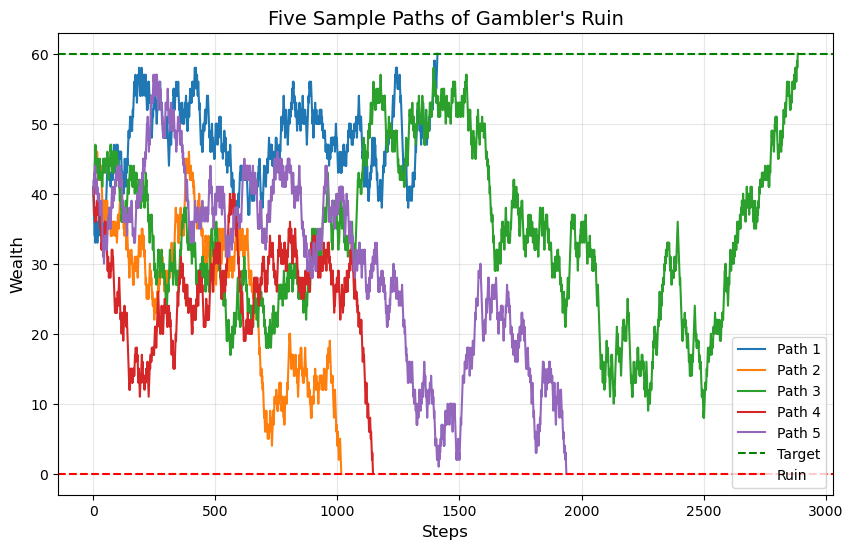

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k, n, p = 40, 60, 0.5  # initial wealth, target wealth, win probability
n_trials = 10_000

# Function to simulate a single gambler's path
def gambler_path(k, n, p):
    wealth = [k]
    while wealth[-1] > 0 and wealth[-1] < n:
        if np.random.rand() < p:
            wealth.append(wealth[-1] + 1)
        else:
            wealth.append(wealth[-1] - 1)
    return wealth

# Plot five sample paths
plt.figure(figsize=(10,6))
for i in range(5):
    path = gambler_path(k, n, p)
    plt.plot(path, label=f"Path {i+1}")
plt.axhline(y=n, color="green", linestyle="--", label="Target")
plt.axhline(y=0, color="red", linestyle="--", label="Ruin")
plt.title("Five Sample Paths of Gambler's Ruin", fontsize=14)
plt.xlabel("Steps", fontsize=12)
plt.ylabel("Wealth", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


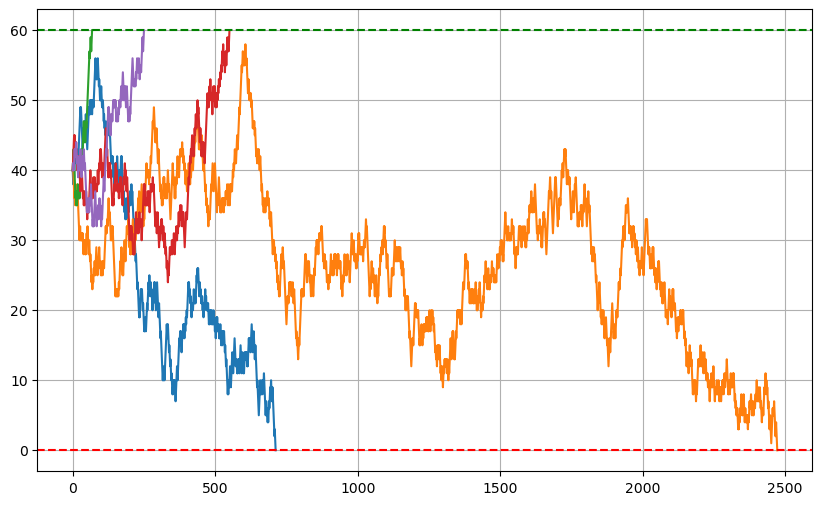

0.6602


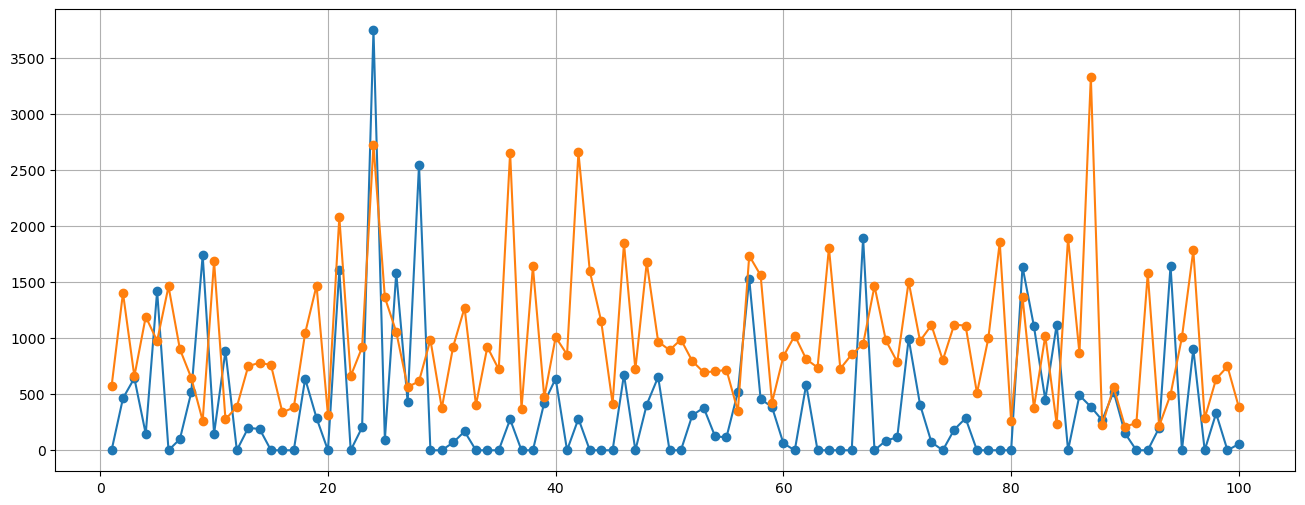

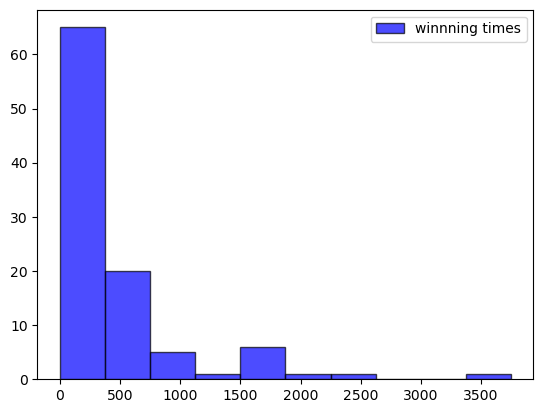

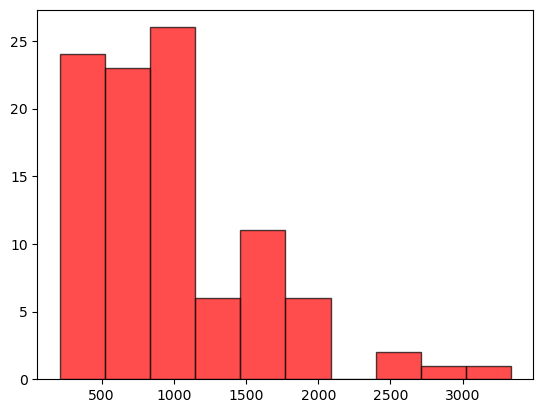

In [57]:
k = 40 
n = 60
p =0.5

def gamblersPath(k,n,p):
    wealth = [k]
    t =0
    while (wealth[-1] >0 and wealth[-1] <n):
        if np.random.rand() <p:
            wealth.append(wealth[-1]+1)
        else:
            wealth.append(wealth[-1]-1)
        t+=1
    return wealth , (wealth[-1]==1),t

plt.figure (figsize = (10,6))
for i in range(5):
    path, hasWon, timeTaken = gamblersPath(k,n,p)
    plt.plot(path)


plt.grid(True)
plt.axhline(y=n, color="green", linestyle="--", label="Target")
plt.axhline(y=0, color="red", linestyle="--", label="Ruin")
plt.show()
first100winningTimes = np.zeros(100)
i=0
first100loosingTimes = np.zeros(100)
j=0
def gamblerWinCheck(k,n,p):
    global i,j
    wealth = k
    t=0
    while(wealth>0 and wealth<n):
        if np.random.rand() < p:
            wealth+=1
        else:
            wealth-=1
        t+=1
    if(wealth==n and i<100):
        first100winningTimes[i] = t
        i+=1
    elif(wealth==0 and j<100):
        first100loosingTimes[j] = t
        j+=1
    
        
        
    return 1 if wealth==n else 0



monteCarloTrials = 10_000
winArray = np.zeros(10_000)
for i in range(10_000):
    winArray[i] = gamblerWinCheck(k,n,p)

empiricalProb = np.sum(winArray)/10_000
print(empiricalProb)
plt.figure(figsize = (16,6))
plt.grid(True)
plt.plot(np.arange(1,101), first100winningTimes, marker = 'o')
plt.plot(np.arange(1,101) , first100loosingTimes , marker = 'o')
plt.show()
plt.hist(first100winningTimes, bins=10, color="blue", edgecolor="black", alpha=0.7, label="winnning times")
plt.legend()
plt.show()
plt.hist(first100loosingTimes, bins=10, color="red", edgecolor="black", alpha=0.7, label="loosing times")
plt.show()

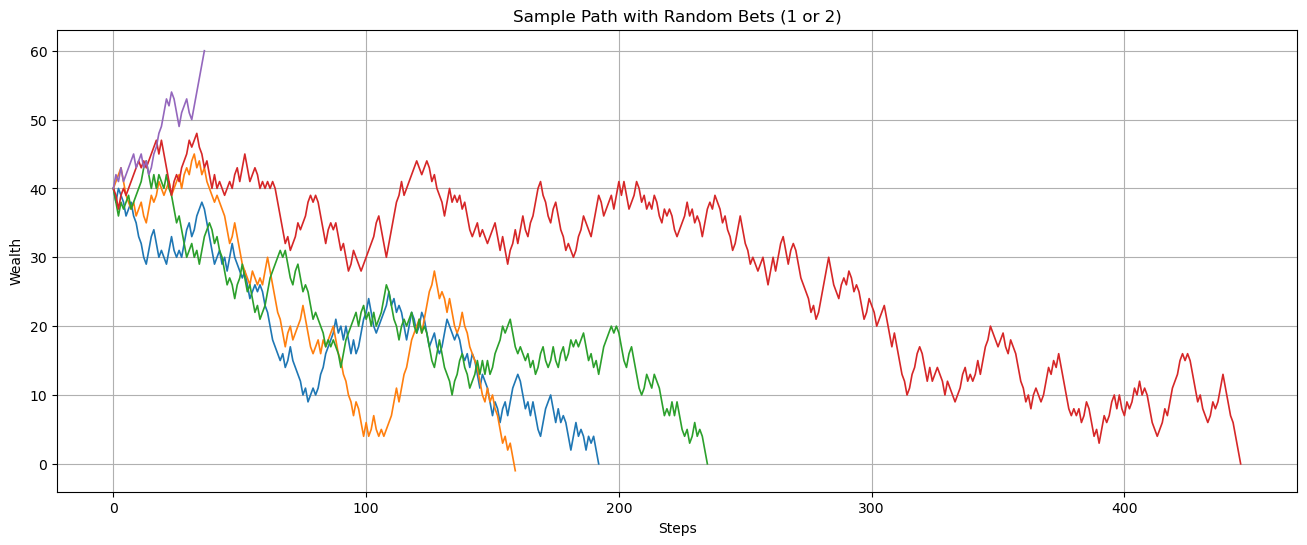

0.1428


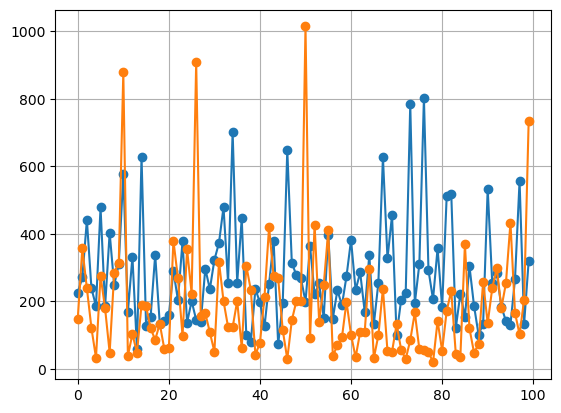

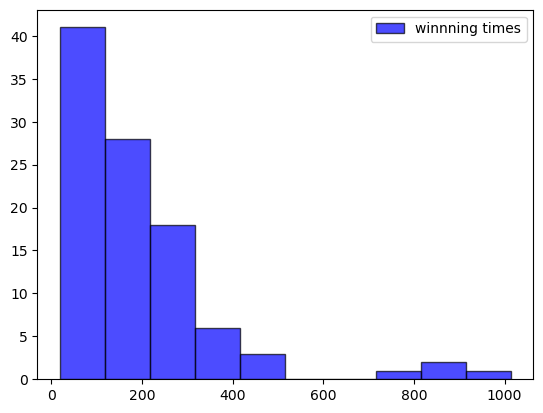

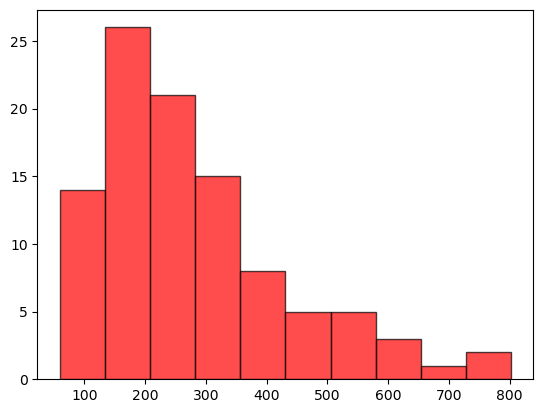

In [85]:
k = 40
n = 60
p1 = 0.6 
p2 = 0.4
## should either bet 1 or 2 dollars
def makeBet(wealth):
    if wealth ==1:
        return 1
    else:
        bet = np.random.choice([1,2])
        return bet
def samplePath(k,n,p1,p2):
    wealth = np.zeros(10_000)
    wealth[0] = k
    i=0
    while(wealth[i] > 0 and wealth[i] <n):
        bet = makeBet(wealth[-1])
        if(bet==1):
            if np.random.rand() < p1:
                wealth[i+1] = wealth[i]+bet
            else:
                wealth[i+1]= wealth[i]-bet
        if(bet==2):
            if np.random.rand() < p2:
                wealth[i+1] = wealth[i]+bet
            else:
                wealth[i+1] = wealth[i]-bet
        i+=1
    return wealth[:i+1]   # trim unused zeros

# --- simulate one path ---
plt.figure(figsize = (16,6))
for i in range (5):
    path = samplePath(k,n,p1,p2)
    plt.plot( path, lw=1.2)
plt.xlabel("Steps")
plt.ylabel("Wealth")
plt.title("Sample Path with Random Bets (1 or 2)")
plt.grid(True)
plt.show()


# monte carlo simulations
monteCarloTrials = 10_000
first100winningTimes = np.zeros(100)
first100loosingTimes = np.zeros(100)
i=0
j=0
def gamblerWinCheck(k,n,p1,p2):
    global i,j
    wealth = k
    t =0
    while(wealth > 0 and wealth <n):
        bet = makeBet(wealth)
        if (bet==1):
            if np.random.rand() < p1:
                wealth+=bet
            else:
                wealth-=bet
        if (bet==2):
            if np.random.rand()<p2:
                wealth+=bet
            else:
                wealth-=bet
        t+=1
    hasWon = 1 if (wealth==n) else 0
    if (hasWon and i<100):
        first100winningTimes[i] = t
        i+=1
    elif((not hasWon) and j<100):
        first100loosingTimes[j] = t
        j+=1
    return hasWon
wins =0
for h in range (monteCarloTrials):
    indi = gamblerWinCheck(k,n,p1,p2)
    wins+=indi

estimatedWinProb = wins/10_000

print(estimatedWinProb)
plt.plot(first100loosingTimes,marker = 'o')
plt.plot(first100winningTimes,marker = 'o')
plt.grid(True)
plt.show()
plt.hist(first100winningTimes, bins=10, color="blue", edgecolor="black", alpha=0.7, label="winnning times")
plt.legend()
plt.show()
plt.hist(first100loosingTimes, bins=10, color="red", edgecolor="black", alpha=0.7, label="loosing times")
plt.show()

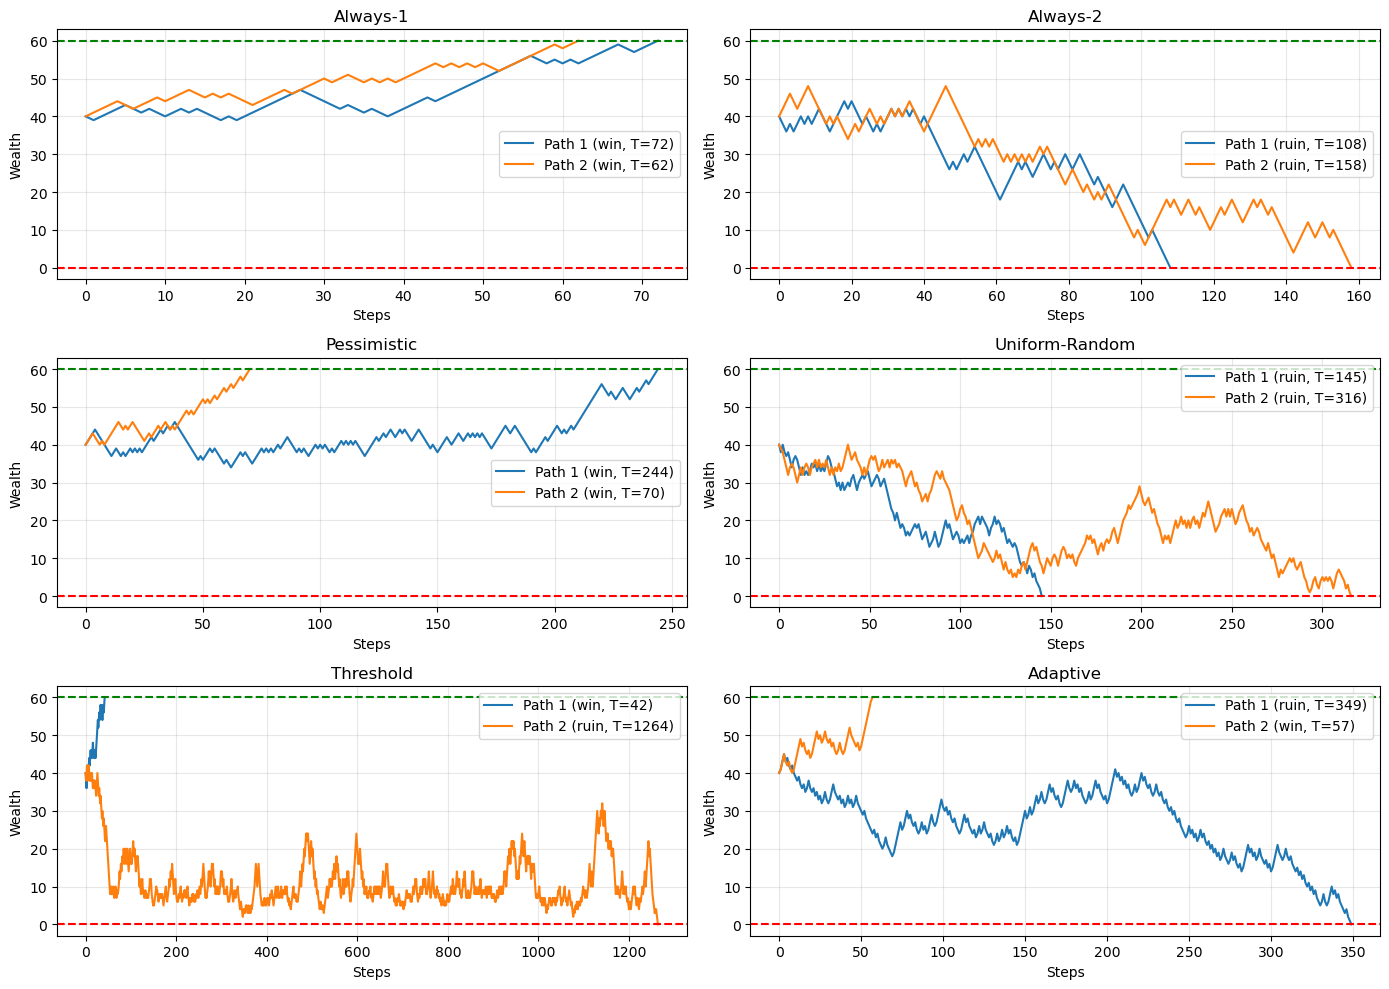

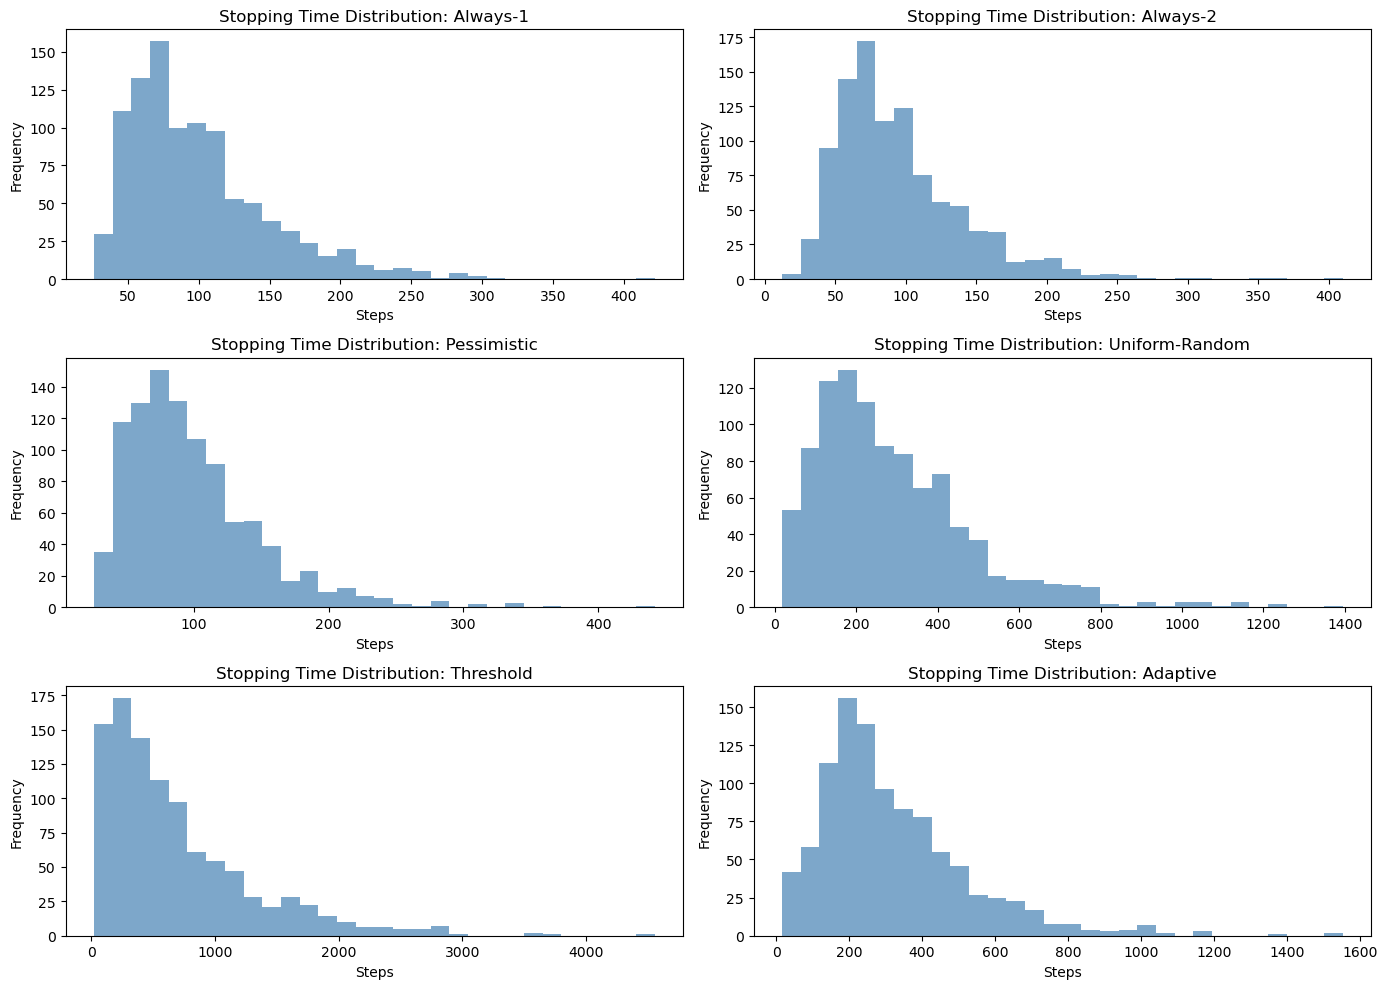

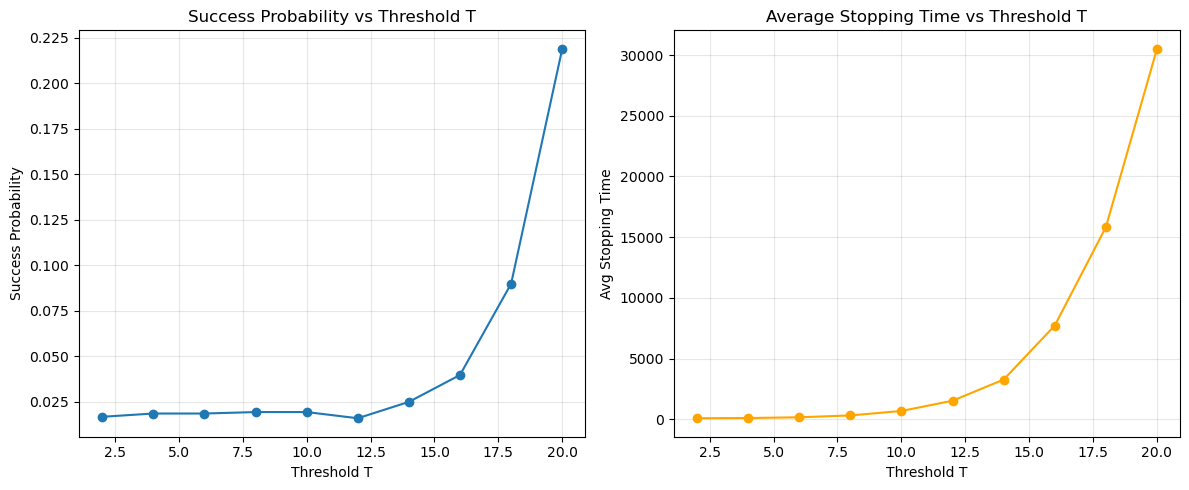

           Policy  Success Probability  Average Stopping Time
0        Always-1               1.0000                98.6052
1        Always-2               0.0136                97.5412
2     Pessimistic               1.0000               100.5432
3  Uniform-Random               0.1964               290.3222
4       Threshold               0.0178               685.9136
5        Adaptive               0.1270               327.3888

Best policy by success probability:
Policy                   Always-1
Success Probability           1.0
Average Stopping Time     98.6052
Name: 0, dtype: object


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Parameters ---
k, n, p1, p2 = 40, 60, 0.6, 0.4
n_trials = 5000  # can raise to 10000 for final
rng = np.random.default_rng(123)

# --- Betting policies ---
def bet_always1(w, prev_bet=None, prev_win=None, T=None):
    return 1

def bet_always2(w, prev_bet=None, prev_win=None, T=None):
    return 1 if w == 1 else 2

def bet_pessimistic(w, prev_bet=None, prev_win=None, T=None):
    # choose Always-i with higher pi
    if p1 >= p2:
        return 1
    else:
        return 1 if w == 1 else 2

def bet_uniform(w, prev_bet=None, prev_win=None, T=None):
    if w == 1:
        return 1
    return rng.choice([1,2])

def bet_threshold(w, prev_bet=None, prev_win=None, T=10):
    return 2 if w >= T else 1

def bet_adaptive(w, prev_bet=None, prev_win=None, T=None):
    if prev_bet is None:  # first bet
        return 1
    return 2 if prev_win else 1

policies = {
    "Always-1": bet_always1,
    "Always-2": bet_always2,
    "Pessimistic": bet_pessimistic,
    "Uniform-Random": bet_uniform,
    "Threshold": bet_threshold,
    "Adaptive": bet_adaptive
}


# --- Simulator ---
def simulate_path(policy_fn, k, n, p1, p2, T=None):
    wealth = [k]
    t = 0
    prev_bet, prev_win = None, None
    while 0 < wealth[-1] < n:
        w = wealth[-1]
        b = policy_fn(w, prev_bet, prev_win, T)
        win_prob = p1 if b == 1 else p2
        if rng.random() < win_prob:
            w_next = min(w + b, n)
            prev_win = True
        else:
            w_next = max(w - b, 0)
            prev_win = False
        wealth.append(w_next)
        prev_bet = b
        t += 1
    return wealth, (wealth[-1] == n), t


# --- 1) Two sample paths per policy ---
plt.figure(figsize=(14,10))
for i,(name,policy) in enumerate(policies.items()):
    plt.subplot(3,2,i+1)
    for j in range(2):
        path, win, T = simulate_path(policy, k, n, p1, p2, T=10)
        plt.plot(path, label=f"Path {j+1} ({'win' if win else 'ruin'}, T={T})")
    plt.axhline(y=n, linestyle="--", color="g")
    plt.axhline(y=0, linestyle="--", color="r")
    plt.title(name)
    plt.xlabel("Steps")
    plt.ylabel("Wealth")
    plt.legend()
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# --- 2) Histogram of stopping times per policy ---
plt.figure(figsize=(14,10))
for i,(name,policy) in enumerate(policies.items()):
    stopping_times = []
    for _ in range(1000):
        _, _, T = simulate_path(policy, k, n, p1, p2, T=10)
        stopping_times.append(T)
    plt.subplot(3,2,i+1)
    plt.hist(stopping_times, bins=30, alpha=0.7, color="steelblue")
    plt.title(f"Stopping Time Distribution: {name}")
    plt.xlabel("Steps")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# --- 3) Threshold sweep ---
Ts = range(2, 22, 2)
success_probs, avg_times = [], []
for T in Ts:
    wins, times = 0, []
    for _ in range(n_trials):
        _, win, t = simulate_path(bet_threshold, k, n, p1, p2, T=T)
        wins += int(win)
        times.append(t)
    success_probs.append(wins/n_trials)
    avg_times.append(np.mean(times))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(Ts, success_probs, marker="o")
plt.title("Success Probability vs Threshold T")
plt.xlabel("Threshold T")
plt.ylabel("Success Probability")
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(Ts, avg_times, marker="o", color="orange")
plt.title("Average Stopping Time vs Threshold T")
plt.xlabel("Threshold T")
plt.ylabel("Avg Stopping Time")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# --- 4) Table of results ---
results = []
for name, policy in policies.items():
    wins, times = 0, []
    for _ in range(n_trials):
        _, win, t = simulate_path(policy, k, n, p1, p2, T=10)
        wins += int(win)
        times.append(t)
    success_prob = wins/n_trials
    avg_time = np.mean(times)
    results.append((name, success_prob, avg_time))

df = pd.DataFrame(results, columns=["Policy","Success Probability","Average Stopping Time"])
print(df)

best_policy = df.loc[df["Success Probability"].idxmax()]
print("\nBest policy by success probability:")
print(best_policy)
